## Trabajo Practico 2

#### Materia: Vision por Computadora 1
#### Alumno: Lucas Rivela

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

#### Parte 1

##### Objetivo



In [18]:
a = np.array([
    [1,4,7,4,1],
    [4,16,26,16,4],
    [7,26,41,26,7],
    [4,16,26,16,4],
    [1,4,7,4,1]
])
print(1/273 * a)
print(np.sum(1/273 * a))

[[0.003663   0.01465201 0.02564103 0.01465201 0.003663  ]
 [0.01465201 0.05860806 0.0952381  0.05860806 0.01465201]
 [0.02564103 0.0952381  0.15018315 0.0952381  0.02564103]
 [0.01465201 0.05860806 0.0952381  0.05860806 0.01465201]
 [0.003663   0.01465201 0.02564103 0.01465201 0.003663  ]]
1.0


In [ ]:
def generate_kernel(k_size, sigma):
    ax = np.linspace(-(k_size - 1) / 2., (k_size - 1) / 2., k_size)
    

In [ ]:
def create_gauss_filter(h, w, k_size=15, sigma=5):
    

In [ ]:
# Cargo la imagen
img = cv.imread('fft_alfa_pred.png', cv.IMREAD_GRAYSCALE)

h, w = img.shape



In [ ]:
kernel, kernel_tf = create_gauss_filter(h, w, k_size=5, sigma=5)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("FFT del kernel")
plt.imshow(np.abs(kernel_tf), cmap='jet')

In [ ]:
kernel, kernel_tf = create_gauss_filter(h, w, k_size=3, sigma=3)

plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.axis('off')
plt.title("Kernel Gausiano")
plt.imshow(kernel, cmap='jet')
plt.subplot(1,2,2)
plt.axis('off')
plt.title("FFT del kernel")
plt.imshow(np.abs(kernel_tf), cmap='jet')

In [ ]:
img_fft = np.fft.fft2(img)
filtered = img_fft * kernel_tf

img_gauss = np.fft.ifftshift(np.real(np.fft.ifft2(filtered)))

plt.figure(figsize=(8,8))
plt.imshow(img_gauss, cmap='gray')
plt.title('Desenfoque gausiano')

#### Conclusiones Parte 1

#### Parte 2

##### Objetivo

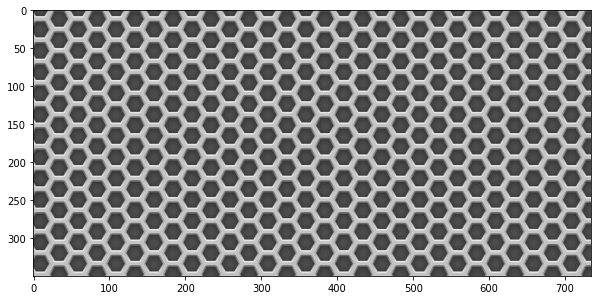

In [15]:
# Cargo la imagen
img = cv.imread('metalgrid.jpg')
plt.figure(figsize=(10,10))
plt.imshow(img)

In [5]:
# Suavizado Gaussiano
blur = cv.GaussianBlur(img,(5,5),0)

# Gradientes
sobelx_64 = cv.Sobel(blur,cv.CV_32F,1,0,ksize=3)
absx_64 = np.absolute(sobelx_64)
sobelx_8u1 = absx_64/absx_64.max()*255
sobelx_8u = np.uint8(sobelx_8u1)

sobely_64 = cv.Sobel(blur,cv.CV_32F,0,1,ksize=3)
absy_64 = np.absolute(sobely_64)
sobely_8u1 = absy_64/absy_64.max()*255
sobely_8u = np.uint8(sobely_8u1)

# Calculamos Magnitud
mag = np.hypot(sobelx_8u, sobely_8u)
mag = mag/mag.max()*255
mag = np.uint8(mag)

# Calculamos Direccion
theta = np.arctan2(sobely_64, sobelx_64)
angle = np.rad2deg(theta)

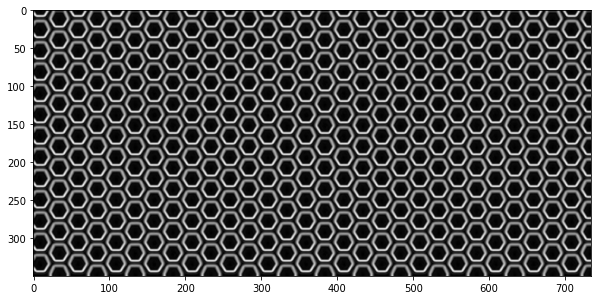

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(mag)

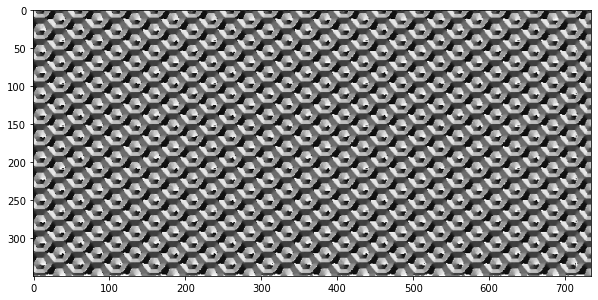

In [13]:
angle_ = np.uint8(angle)
# Normalizar la escala a 0-255
angle_ = cv.normalize(angle, angle, 0, 255, cv.NORM_MINMAX).astype('uint8')
plt.figure(figsize=(10,10))
plt.imshow(angle_)

#### Conclusiones Parte 2